In [1]:
# Dependencies and Set up
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Fetching API
# url = 'https://min-api.cryptocompare.com/data/all/coinlist'
# r = requests.get(url)
# data = r.json()
# data

In [3]:
# Selecting Data from dictionary, reading and tanspose DF
# data = data['Data']
# data = pd.DataFrame.from_dict(data)
# data = data.T
# data

In [4]:
# Opening csv
data = pd.read_csv('Resource/crypto_data.csv')
data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
# Columns
# data.columns

In [6]:
# Dropping columns
# data.drop(columns = [
#     'Url',
#     'ImageUrl',
#     'ContentCreatedOn',
#     'Name',
#     'Symbol',
#     'FullName',
#     'Description',
#     'AssetTokenStatus',
#     'SortOrder',
#     'Sponsored',
#     'Taxonomy',
#     'Rating',
#     'CirculatingSupply',
#     'BlockNumber',
#     'NetHashesPerSecond',
#     'BlockReward',
#     'BlockTime',
#     'AssetLaunchDate',
#     'AssetWhitepaperUrl',
#     'MaxSupply',
#     'MktCapPenalty',
#     'IsUsedInDefi',
#     'IsUsedInNft',
#     'PlatformType',
#     'BuiltOn',
#     'SmartContractAddress',
#     'DecimalPoints',
#     'Difficulty',
#     'AlgorithmType',
#     'AssetWebsiteUrl'
# ],inplace=True)

In [7]:
# Discard all cryptocurrencies that are not being traded
cdata = data.loc[data['IsTrading']== True]
cdata

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
# Drop the IsTrading column from the dataframe
cdata = cdata.drop(columns = 'IsTrading')

In [9]:
# Remove all rows that have at least one null value
cdata.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [10]:
# Dropping nulls
cdata = cdata.dropna()
cdata

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Filter for cryptocurrencies that have been mined.
cdata = cdata.loc[cdata['TotalCoinsMined'] > 0]
cdata

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Veryfiying nulls
cdata.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [13]:
# Saving CoinName (just in case)
labels= cdata['CoinName']
labels

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [14]:
# Dropping column
cdata.drop(columns ='CoinName', inplace = True)
cdata

/Users/karlaflores/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [15]:
# Setting up index
cdata = cdata.set_index('Unnamed: 0')

In [16]:
# Creating dummy variables
X = pd.get_dummies(cdata, columns = ['ProofType','Algorithm'])
X.shape

(532, 98)

In [17]:
X

,TotalCoinsMined,TotalCoinSupply,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.08703883,
        -0.08703883, -0.10680283]])

In [19]:
X_scaled.shape

(532, 98)

# Dimensionality Reduction

In [20]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)

#Get principal components
df_pca = pca.fit_transform(X_scaled)
df_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -1.26750423e-16,  1.25419852e-15,  6.60895243e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -1.89054534e-16,  1.68655252e-15, -7.28125125e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         3.69762716e-14,  2.20832022e-14, -3.51508568e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -2.74775553e-14,  3.17615759e-14,  9.69693002e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.76713466e-16, -5.25646697e-16,  3.16389250e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         1.24152744e-15,  1.42174916e-15,  7.43414614e-16]])

In [21]:
df_pca.shape

(532, 74)

In [22]:
# Data frame
df_pca = pd.DataFrame(data= df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.701841e-14,5.234900e-14,2.693587e-12,-0.007129,-1.319756,-0.051813,...,-4.260599e-15,-6.955336e-16,-2.492898e-15,2.410255e-15,-2.437666e-15,2.846442e-15,-1.728928e-15,-1.267504e-16,1.254199e-15,6.608952e-16
1,-0.318434,1.032331,-0.591126,0.001386,-1.587738e-14,5.138430e-14,2.671136e-12,-0.007739,-1.322514,-0.056674,...,-4.714292e-15,-1.502294e-15,-2.369562e-15,2.850210e-15,-2.042657e-15,2.964025e-15,-2.112049e-15,-1.890545e-16,1.686553e-15,-7.281251e-16
2,2.305468,1.656383,-0.683617,0.004731,-3.241252e-14,5.616447e-14,9.207736e-12,-0.054781,-1.542879,-0.943951,...,9.730983e-15,1.819229e-14,3.230119e-14,3.924040e-14,6.462610e-14,-6.033011e-14,4.569698e-14,3.697627e-14,2.208320e-14,-3.515086e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.268692e-15,-2.045732e-14,-2.395910e-12,-0.002071,0.281463,0.251862,...,-1.421386e-15,-2.038938e-15,2.150009e-15,-1.075764e-14,-1.215486e-15,-2.808137e-14,-1.956127e-15,3.803804e-15,1.186330e-14,3.908188e-15
4,-0.151768,-2.036192,0.396182,-0.001705,9.405152e-15,-4.258007e-14,-3.309233e-12,0.027735,0.519099,0.188820,...,-1.551320e-14,-2.091417e-14,-1.044086e-13,1.109509e-14,1.098861e-14,3.812324e-14,-7.503773e-14,-8.814406e-14,3.628828e-14,-7.632377e-14


In [23]:
pca.explained_variance_

array([2.74246154, 2.1029187 , 2.01436892, 2.00754156, 2.00754005,
       2.00754005, 2.00754005, 2.00547232, 1.8369474 , 1.72440686,
       1.70949674, 1.59943293, 1.56717658, 1.52297788, 1.40895337,
       1.29713801, 1.21413359, 1.18435602, 1.08424717, 1.05204614,
       1.03003376, 1.02198993, 1.02022505, 1.01890094, 1.01661666,
       1.01526166, 1.01091357, 1.0095665 , 1.00947326, 1.00947326,
       1.00947323, 1.00930286, 1.00840538, 1.00769894, 1.00757175,
       1.00713878, 1.00694666, 1.0064583 , 1.00631669, 1.00568376,
       1.00566393, 1.00566393, 1.00559617, 1.00542785, 1.00509215,
       1.00491444, 1.00442832, 1.00388029, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002])

In [24]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [25]:
labels

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [26]:
# Perform dimensionality reduction with PCA
pca_ = PCA(n_components=3)

#Get principal components
df_pca_ = pca_.fit_transform(X_scaled)
df_pca_

array([[-0.33753533,  1.02684905, -0.59676985],
       [-0.32096826,  1.02764623, -0.59731629],
       [ 2.29890984,  1.77793686, -0.75455902],
       ...,
       [ 0.31720196, -2.23922046,  0.40779325],
       [-0.15219378, -1.87913232,  0.47988632],
       [-0.30005213,  0.75237278, -0.24390596]])

In [27]:
df_pca_.shape

(532, 3)

In [28]:
# Data frame
df_pca_ = pd.DataFrame(data= df_pca)
df_pca_.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.701841e-14,5.234900e-14,2.693587e-12,-0.007129,-1.319756,-0.051813,...,-4.260599e-15,-6.955336e-16,-2.492898e-15,2.410255e-15,-2.437666e-15,2.846442e-15,-1.728928e-15,-1.267504e-16,1.254199e-15,6.608952e-16
1,-0.318434,1.032331,-0.591126,0.001386,-1.587738e-14,5.138430e-14,2.671136e-12,-0.007739,-1.322514,-0.056674,...,-4.714292e-15,-1.502294e-15,-2.369562e-15,2.850210e-15,-2.042657e-15,2.964025e-15,-2.112049e-15,-1.890545e-16,1.686553e-15,-7.281251e-16
2,2.305468,1.656383,-0.683617,0.004731,-3.241252e-14,5.616447e-14,9.207736e-12,-0.054781,-1.542879,-0.943951,...,9.730983e-15,1.819229e-14,3.230119e-14,3.924040e-14,6.462610e-14,-6.033011e-14,4.569698e-14,3.697627e-14,2.208320e-14,-3.515086e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.268692e-15,-2.045732e-14,-2.395910e-12,-0.002071,0.281463,0.251862,...,-1.421386e-15,-2.038938e-15,2.150009e-15,-1.075764e-14,-1.215486e-15,-2.808137e-14,-1.956127e-15,3.803804e-15,1.186330e-14,3.908188e-15
4,-0.151768,-2.036192,0.396182,-0.001705,9.405152e-15,-4.258007e-14,-3.309233e-12,0.027735,0.519099,0.188820,...,-1.551320e-14,-2.091417e-14,-1.044086e-13,1.109509e-14,1.098861e-14,3.812324e-14,-7.503773e-14,-8.814406e-14,3.628828e-14,-7.632377e-14


In [29]:
pca.explained_variance_

array([2.74246154, 2.1029187 , 2.01436892, 2.00754156, 2.00754005,
       2.00754005, 2.00754005, 2.00547232, 1.8369474 , 1.72440686,
       1.70949674, 1.59943293, 1.56717658, 1.52297788, 1.40895337,
       1.29713801, 1.21413359, 1.18435602, 1.08424717, 1.05204614,
       1.03003376, 1.02198993, 1.02022505, 1.01890094, 1.01661666,
       1.01526166, 1.01091357, 1.0095665 , 1.00947326, 1.00947326,
       1.00947323, 1.00930286, 1.00840538, 1.00769894, 1.00757175,
       1.00713878, 1.00694666, 1.0064583 , 1.00631669, 1.00568376,
       1.00566393, 1.00566393, 1.00559617, 1.00542785, 1.00509215,
       1.00491444, 1.00442832, 1.00388029, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002])

In [30]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [31]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [32]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

In [33]:
tsne_features

array([[ 14.223066 ,  -6.2748847],
       [ 18.966215 , -11.1545515],
       [ 23.338724 , -17.021948 ],
       ...,
       [-10.464654 , -17.171175 ],
       [-18.08414  ,  -8.966456 ],
       [ -2.6300263,  12.734525 ]], dtype=float32)

In [34]:
tsne_features.shape

(532, 2)

In [35]:
# Prepare to plot the dataset

# The first column of transformed features
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

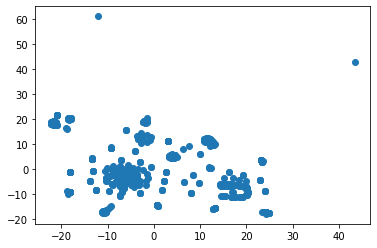

In [36]:
# Visualize the clusters
plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

In [37]:
labels.value_counts()

DubaiCoin           2
StableCoin          1
Dynamic             1
MassGrid            1
Halloween Coin      1
                   ..
SafeExchangeCoin    1
Monero Classic      1
Crown Coin          1
 ClubCoin           1
Bitcoin Planet      1
Name: CoinName, Length: 531, dtype: int64

In [38]:
# Prepare to plot the dataset

# The first column of transformed features
df_pca_['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca_['y'] = tsne_features[:,1]

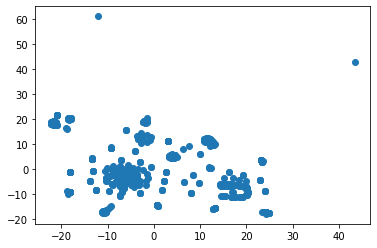

In [39]:
# Visualize the clusters
plt.scatter(df_pca_['x'], df_pca_['y'])
plt.show()

# K-means

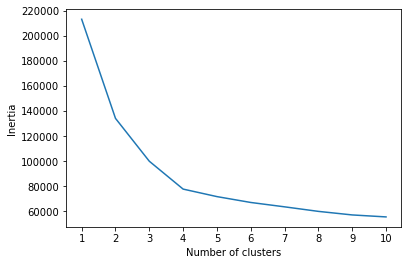

In [40]:
# Initialize K-means model
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    km.predict
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
df_elbow

,k,inertia
0,1,213250.779239
1,2,134166.761988
2,3,99977.307748
3,4,77748.733045
4,5,71757.160262
5,6,67080.875496
6,7,63595.926020
7,8,59972.769679
8,9,57133.473154
9,10,55554.036264


In [42]:
# This DataFrame should include a new column containing the clusters found
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [43]:
# Cluster with the best value of k
clusters = get_clusters(5,df_pca)

In [44]:
clusters

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-1.701841e-14,5.234900e-14,2.693587e-12,-0.007129,-1.319756,-0.051813,...,2.410255e-15,-2.437666e-15,2.846442e-15,-1.728928e-15,-1.267504e-16,1.254199e-15,6.608952e-16,14.223066,-6.274885,1
1,-0.318434,1.032331,-0.591126,0.001386,-1.587738e-14,5.138430e-14,2.671136e-12,-0.007739,-1.322514,-0.056674,...,2.850210e-15,-2.042657e-15,2.964025e-15,-2.112049e-15,-1.890545e-16,1.686553e-15,-7.281251e-16,18.966215,-11.154552,1
2,2.305468,1.656383,-0.683617,0.004731,-3.241252e-14,5.616447e-14,9.207736e-12,-0.054781,-1.542879,-0.943951,...,3.924040e-14,6.462610e-14,-6.033011e-14,4.569698e-14,3.697627e-14,2.208320e-14,-3.515086e-14,23.338724,-17.021948,1
3,-0.145184,-1.320593,0.192813,-0.001229,9.268692e-15,-2.045732e-14,-2.395910e-12,-0.002071,0.281463,0.251862,...,-1.075764e-14,-1.215486e-15,-2.808137e-14,-1.956127e-15,3.803804e-15,1.186330e-14,3.908188e-15,-22.324120,18.230764,4
4,-0.151768,-2.036192,0.396182,-0.001705,9.405152e-15,-4.258007e-14,-3.309233e-12,0.027735,0.519099,0.188820,...,1.109509e-14,1.098861e-14,3.812324e-14,-7.503773e-14,-8.814406e-14,3.628828e-14,-7.632377e-14,-18.087603,-1.202409,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,3.261624e-14,8.693263e-14,-1.629869e-11,-0.851713,2.041159,3.560713,...,-1.451753e-14,-4.831165e-16,-2.897384e-14,-3.978536e-15,2.086013e-15,1.233139e-14,4.439598e-15,-19.111816,16.412964,4
528,-0.333144,1.032071,-0.590740,0.001399,-1.700209e-14,5.270187e-14,2.698181e-12,-0.007154,-1.320125,-0.052460,...,2.618221e-15,-2.280305e-15,2.556896e-15,-1.591959e-15,1.401725e-16,9.962256e-16,6.107514e-16,19.940630,-7.736931,1
529,0.324349,-2.312308,0.421515,-0.001319,8.432016e-15,-4.696282e-14,-2.552543e-12,0.017309,0.161077,-0.047787,...,-4.743336e-14,-3.554623e-14,-2.756141e-14,-3.307820e-14,-2.747756e-14,3.176158e-14,9.696930e-15,-10.464654,-17.171175,2
530,-0.149364,-2.049336,0.412968,-0.001745,1.447107e-14,-4.444065e-14,-3.385260e-12,0.028954,0.544389,0.233373,...,-4.156364e-15,-9.386548e-17,-5.251461e-15,2.453018e-16,3.767135e-16,-5.256467e-16,3.163892e-15,-18.084141,-8.966456,2


In [141]:
# Function for labeling cluster in a scatter plot
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'], alpha=0.7,marker='^')
    plt.rcParams["figure.figsize"] = (5, 9)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

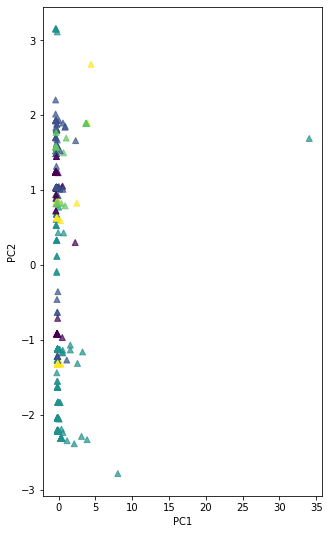

In [142]:
show_clusters(clusters)

In [126]:
# 3D scatter with clusters
import plotly.express as px
fig = px.scatter_3d(
    clusters,
    x=0,
    y=1,
    z=2,
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()